In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utilities import get_git_repo_path, log_bin

# Setup
git_path = get_git_repo_path()
all_temperatures = np.array([0.8, 1.0, 1.2, 1.5, 1.8, 2.2, 2.6, 3.0])
target_frequency = 150929  # MHz
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K

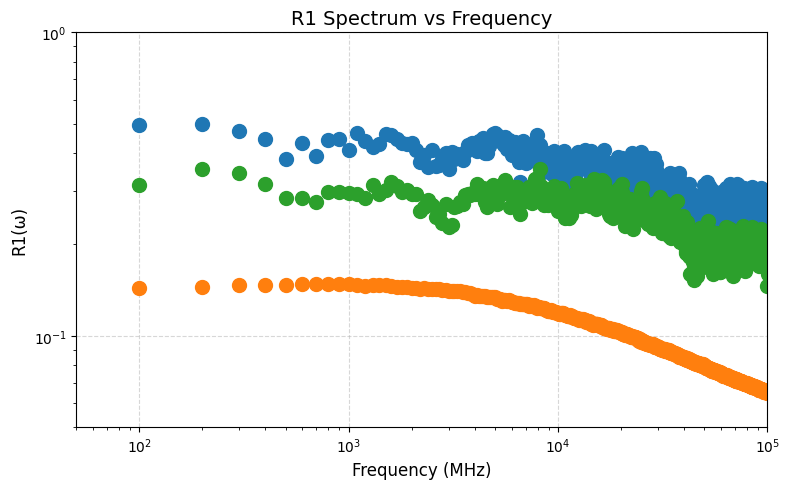

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))

folder = "nmr_full/"
result_file = folder+"result.npy"
data = np.load(result_file, allow_pickle=True).item()
time_vector = np.real(data["t"])[1:]
freq_vector = np.real(data["f"])[1:]
idx_closest = np.argmin(np.abs(freq_vector - target_frequency))
R1 = data["R1"][1:]
R2 = data["R2"][1:]
C = data["C"][1:]
_, R1_spectra_log = log_bin(freq_vector, R1, num_bins = 200)
freq_vector_log, R2_spectra_log = log_bin(freq_vector, R2, num_bins = 200)
time_vector_log, correlation_function_log = log_bin(time_vector, C, num_bins = 200)
np.savetxt(folder+"R1_vs_f.dat", np.vstack([freq_vector_log, R1_spectra_log]).T)
np.savetxt(folder+"R2_vs_f.dat", np.vstack([freq_vector_log, R2_spectra_log]).T)
np.savetxt(folder+"Gij_vs_t.dat", np.vstack([time_vector_log, correlation_function_log]).T)

ax.loglog(freq_vector, R1, "o", label="full", markersize = 10)

folder = "nmr_water_inter/"
result_file = folder+"result.npy"
data = np.load(result_file, allow_pickle=True).item()
time_vector = np.real(data["t"])[1:]
freq_vector = np.real(data["f"])[1:]
idx_closest = np.argmin(np.abs(freq_vector - target_frequency))
R1_inter = data["R1"][1:]
R2 = data["R2"][1:]
C = data["C"][1:]
_, R1_spectra_log = log_bin(freq_vector, R1, num_bins = 200)
freq_vector_log, R2_spectra_log = log_bin(freq_vector, R2, num_bins = 200)
time_vector_log, correlation_function_log = log_bin(time_vector, C, num_bins = 200)
np.savetxt(folder+"R1_vs_f.dat", np.vstack([freq_vector_log, R1_spectra_log]).T)
np.savetxt(folder+"R2_vs_f.dat", np.vstack([freq_vector_log, R2_spectra_log]).T)
np.savetxt(folder+"Gij_vs_t.dat", np.vstack([time_vector_log, correlation_function_log]).T)

ax.loglog(freq_vector, R1_inter, "o", label="water inter", markersize = 10)

folder = "nmr_water_intra/"
result_file = folder+"result.npy"
data = np.load(result_file, allow_pickle=True).item()
time_vector = np.real(data["t"])[1:]
freq_vector = np.real(data["f"])[1:]
idx_closest = np.argmin(np.abs(freq_vector - target_frequency))
R1_intra = data["R1"][1:]
R2 = data["R2"][1:]
C = data["C"][1:]
_, R1_spectra_log = log_bin(freq_vector, R1, num_bins = 200)
freq_vector_log, R2_spectra_log = log_bin(freq_vector, R2, num_bins = 200)
time_vector_log, correlation_function_log = log_bin(time_vector, C, num_bins = 200)
np.savetxt(folder+"R1_vs_f.dat", np.vstack([freq_vector_log, R1_spectra_log]).T)
np.savetxt(folder+"R2_vs_f.dat", np.vstack([freq_vector_log, R2_spectra_log]).T)
np.savetxt(folder+"Gij_vs_t.dat", np.vstack([time_vector_log, correlation_function_log]).T)

ax.loglog(freq_vector, R1_intra, "o", label="water intra", markersize = 10)

# ax.loglog(freq_vector, R1_inter+R1_intra, "o", label="water total", markersize = 10)

# Axis labels and title
ax.set_xlabel("Frequency (MHz)", fontsize=12)
ax.set_ylabel("R1(ω)", fontsize=12)
ax.set_title("R1 Spectrum vs Frequency", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.5)

plt.xlim([50, 1e5])
plt.ylim([0.05, 1])

plt.tight_layout()
plt.savefig("R1_spectrum.png", dpi=300)
plt.show()